In [ ]:
# 07/11/2024
# https://seaborn.pydata.org/tutorial/function_overview.html

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Ejemplos tomados de
https://seaborn.pydata.org/archive/0.12/tutorial/distributions.html

El texto en cursiva está traducido de la documentación.

Los primeros ejemplos usan el conjunto de datos de pingüinos.

In [ ]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
print(penguins.describe())

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000


*Un gráfico de estimación de densidad del núcleo (KDE) es un método para visualizar la distribución de observaciones en un conjunto de datos, análogo a un histograma. KDE representa los datos utilizando una curva de densidad de probabilidad continua en una o más dimensiones.*

*En relación con un histograma, KDE puede producir un gráfico menos desordenado y más interpretable, especialmente cuando se dibujan múltiples distribuciones. Pero tiene el potencial de introducir distorsiones si la distribución subyacente es limitada o no es uniforme. Al igual que un histograma, la calidad de la representación también depende de la selección de buenos parámetros de suavizado.*

Un KDE es una suma de distribuciones normales ponderadas, intentas ajustar para tener un KDE.

Para gŕaficos kde se puede usar la función a nivel de figura displot() con kind='kde' o la función a nivel de Axes  kdeplot().
https://seaborn.pydata.org/archive/0.12/generated/seaborn.displot.html


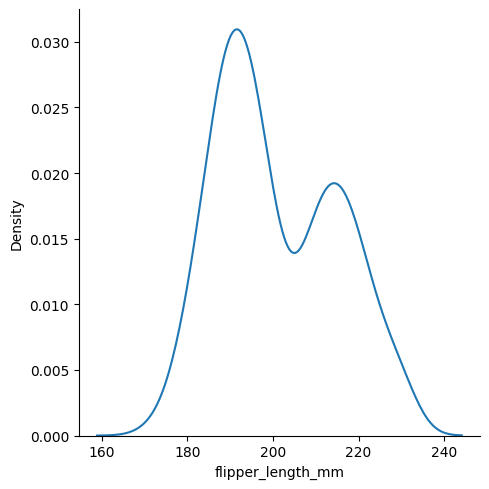

In [ ]:
sns.displot(
    penguins,
    x="flipper_length_mm",
    kind="kde"
)

*Al igual que con el tamaño del contenedor en el histograma, la capacidad de KDE para representar con precisión los datos depende de la elección del ancho de banda de suavizado. Una estimación demasiado suavizada podría borrar características significativas, pero una estimación poco suavizada puede oscurecer la forma verdadera dentro del ruido aleatorio. La forma más sencilla de comprobar la solidez de la estimación es ajustar el ancho de banda predeterminado:*



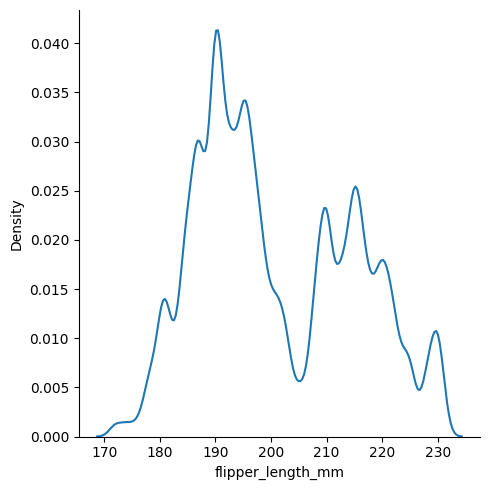

In [ ]:
sns.displot(
    penguins,
    x="flipper_length_mm",
    kind="kde",
    bw_adjust=.25
)

*Observe cómo el estrecho ancho de banda hace que la bimodalidad sea mucho más evidente, pero la curva es mucho menos suave. Por el contrario, un ancho de banda mayor oscurece la bimodalidad casi por completo:*


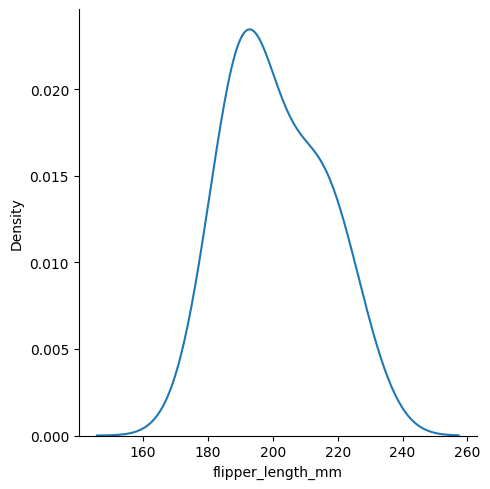

In [ ]:
sns.displot(
    penguins,
    x="flipper_length_mm",
    kind="kde",
    bw_adjust=2
)

# Problemas de kde

Para este ejemplo se usan los datos de propinas.

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Los gráficos de KDE tienen muchas ventajas. Las características importantes de los datos son fáciles de discernir (tendencia central, bimodalidad, asimetría) y permiten realizar comparaciones sencillas entre subconjuntos. Pero también hay situaciones en las que KDE representa mal los datos subyacentes. Esto se debe a que la lógica de KDE supone que la distribución subyacente es fluida e ilimitada. Una forma en la que este supuesto puede fallar es cuando una variable refleja una cantidad naturalmente acotada. Si hay observaciones cercanas al límite (por ejemplo, valores pequeños de una variable que no pueden *ser negativos), la curva KDE puede extenderse a valores poco realistas:*

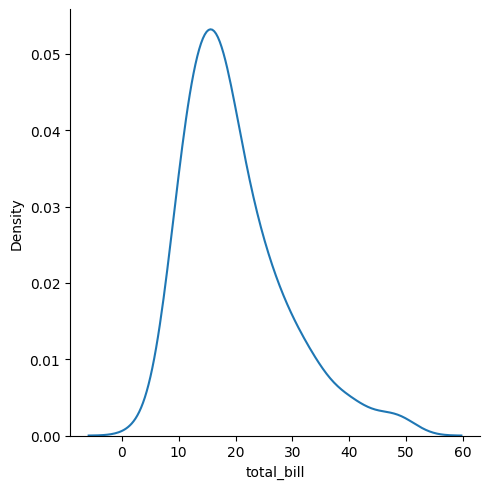

In [ ]:
sns.displot(
    tips,
    x="total_bill",
    kind="kde"
)

*Esto se puede evitar parcialmente con el parámetro de corte, que especifica hasta qué punto debe extenderse la curva más allá de los puntos de datos extremos. Pero esto sólo influye en dónde se traza la curva; la estimación de densidad aún se suavizará en el rango donde no pueden existir datos, lo que hará que sea artificialmente baja en los extremos de la distribución:*

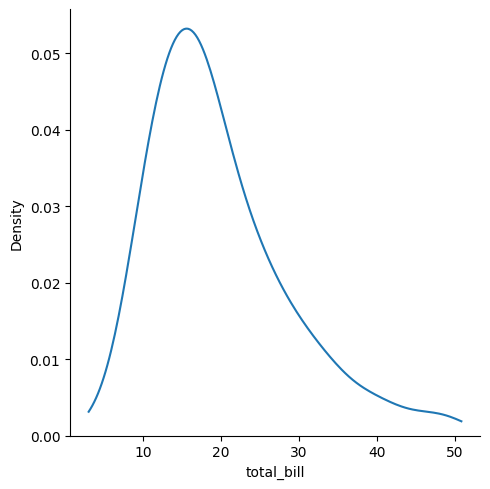

In [ ]:
sns.displot(
    tips,
    x="total_bill",
    kind="kde",
    cut=0
)

Para el siguiente ejemplo carga el conjunto de datos de diamantes:

In [ ]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


*El enfoque de KDE también falla para datos discretos o cuando los datos son naturalmente continuos pero los valores específicos están sobrerrepresentados. Lo importante a tener en cuenta es que KDE siempre le mostrará una curva suave, incluso cuando los datos en sí no lo sean. Por ejemplo, considere esta distribución de pesos de diamantes:*

<Axes: xlabel='carat', ylabel='Density'>

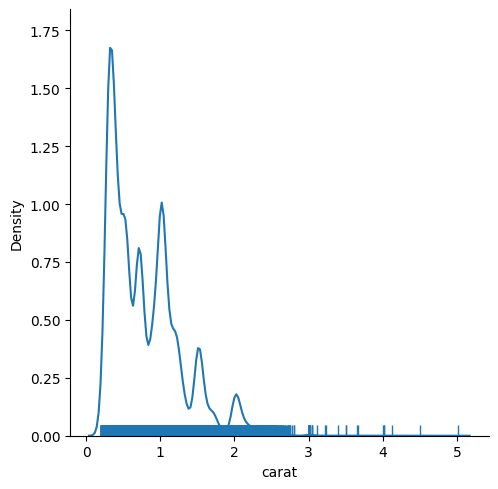

In [ ]:
diamonds = sns.load_dataset("diamonds")

sns.displot(
    diamonds,
    x="carat",
    kind="kde"
)

sns.rugplot(
    diamonds,
    x="carat"
)

*Si bien KDE sugiere que hay picos alrededor de valores específicos, el histograma revela una distribución mucho más irregular:*

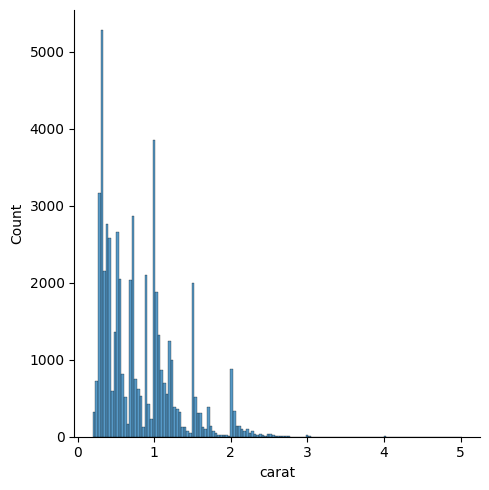

In [ ]:
sns.displot(
    diamonds,
    x="carat"
)

*Como solución de compromiso, es posible combinar estos dos enfoques. Mientras está en modo histograma, displot() (como con histplot()) tiene la opción de incluir la curva KDE suavizada (nota: kde=True, no kind="kde")*

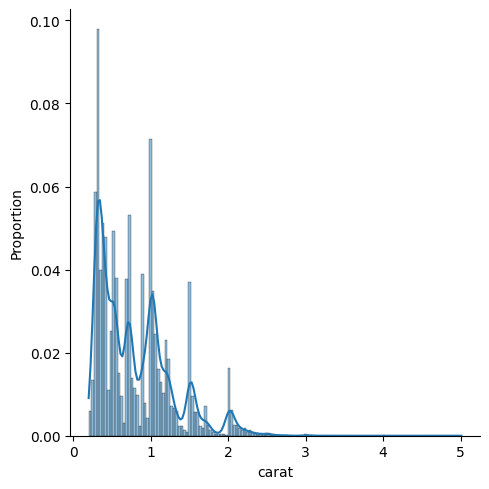

In [ ]:
sns.displot(
    diamonds,
    x="carat",
    kde=True,
    stat = "proportion"
)